In [10]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_keys

# Import the datetime module from the datatime library
from datetime import datetime

In [11]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [12]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_keys
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d2c9d2493e0412e81cec53bf032ff101


In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | leku
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | sao filipe
Processing Record 9 of Set 1 | port lincoln
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | ewa beach
Processing Record 12 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | kharan
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | severo-kurilsk
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | ozernovskiy
Processing Record 19 of Set 1 | chokurdakh
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | mataura

Processing Record 37 of Set 4 | santiago del estero
Processing Record 38 of Set 4 | liusha
Processing Record 39 of Set 4 | honningsvag
Processing Record 40 of Set 4 | ambilobe
Processing Record 41 of Set 4 | moose factory
Processing Record 42 of Set 4 | itarema
Processing Record 43 of Set 4 | douglas
Processing Record 44 of Set 4 | ancud
Processing Record 45 of Set 4 | leshukonskoye
Processing Record 46 of Set 4 | chara
Processing Record 47 of Set 4 | kyren
Processing Record 48 of Set 4 | comodoro rivadavia
Processing Record 49 of Set 4 | yar-sale
Processing Record 50 of Set 4 | thompson
Processing Record 1 of Set 5 | champasak
Processing Record 2 of Set 5 | nazarovo
Processing Record 3 of Set 5 | umm kaddadah
Processing Record 4 of Set 5 | xichang
Processing Record 5 of Set 5 | san lorenzo
Processing Record 6 of Set 5 | rudsar
Processing Record 7 of Set 5 | teguise
Processing Record 8 of Set 5 | shelopugino
Processing Record 9 of Set 5 | pevek
Processing Record 10 of Set 5 | caravelas

Processing Record 30 of Set 8 | carballo
Processing Record 31 of Set 8 | bermeo
Processing Record 32 of Set 8 | vila franca do campo
Processing Record 33 of Set 8 | kalianget
Processing Record 34 of Set 8 | samusu
City not found. Skipping...
Processing Record 35 of Set 8 | dashitou
Processing Record 36 of Set 8 | avarua
Processing Record 37 of Set 8 | geraldton
Processing Record 38 of Set 8 | kaili
Processing Record 39 of Set 8 | beian
Processing Record 40 of Set 8 | aklavik
Processing Record 41 of Set 8 | kachiry
Processing Record 42 of Set 8 | georgetown
Processing Record 43 of Set 8 | amga
Processing Record 44 of Set 8 | hukuntsi
Processing Record 45 of Set 8 | aksu
Processing Record 46 of Set 8 | achisay
City not found. Skipping...
Processing Record 47 of Set 8 | ambalavao
Processing Record 48 of Set 8 | tautira
Processing Record 49 of Set 8 | srednekolymsk
Processing Record 50 of Set 8 | chengmai
City not found. Skipping...
Processing Record 1 of Set 9 | sur
Processing Record 2 of

Processing Record 17 of Set 12 | sabha
Processing Record 18 of Set 12 | wenzhou
Processing Record 19 of Set 12 | awbari
Processing Record 20 of Set 12 | dabakala
Processing Record 21 of Set 12 | saint-joseph
Processing Record 22 of Set 12 | yomitan
City not found. Skipping...
Processing Record 23 of Set 12 | islamkot
Processing Record 24 of Set 12 | werda
Processing Record 25 of Set 12 | palitana
Processing Record 26 of Set 12 | xining
Processing Record 27 of Set 12 | makat
Processing Record 28 of Set 12 | sao lourenco do oeste
Processing Record 29 of Set 12 | varna
Processing Record 30 of Set 12 | aljezur
Processing Record 31 of Set 12 | mbini
Processing Record 32 of Set 12 | san carlos de bariloche
Processing Record 33 of Set 12 | hualmay
Processing Record 34 of Set 12 | rawson
Processing Record 35 of Set 12 | sistranda
Processing Record 36 of Set 12 | minden
Processing Record 37 of Set 12 | kolo
Processing Record 38 of Set 12 | pangody
Processing Record 39 of Set 12 | beisfjord
Proc

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,55.06,50,75,12.66,AR,2021-09-24 15:28:03
1,Cape Town,-33.9258,18.4232,66.61,59,0,16.11,ZA,2021-09-24 15:25:41
2,Rikitea,-23.1203,-134.9692,73.47,78,100,21.09,PF,2021-09-24 15:23:28
3,Arraial Do Cabo,-22.9661,-42.0278,76.96,43,0,25.32,BR,2021-09-24 15:28:03
4,Dikson,73.5069,80.5464,35.49,82,100,14.29,RU,2021-09-24 15:28:04


In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-09-24 15:28:03,-54.8000,-68.3000,55.06,50,75,12.66
1,Cape Town,ZA,2021-09-24 15:25:41,-33.9258,18.4232,66.61,59,0,16.11
2,Rikitea,PF,2021-09-24 15:23:28,-23.1203,-134.9692,73.47,78,100,21.09
3,Arraial Do Cabo,BR,2021-09-24 15:28:03,-22.9661,-42.0278,76.96,43,0,25.32
4,Dikson,RU,2021-09-24 15:28:04,73.5069,80.5464,35.49,82,100,14.29
5,Leku,ET,2021-09-24 15:28:04,6.8667,38.4500,62.78,88,96,4.16
6,Busselton,AU,2021-09-24 15:27:44,-33.6500,115.3333,50.09,75,20,14.97
7,Sao Filipe,CV,2021-09-24 15:28:05,14.8961,-24.4956,79.03,76,57,6.15
8,Port Lincoln,AU,2021-09-24 15:28:05,-34.7333,135.8667,52.61,68,100,11.30
9,Nikolskoye,RU,2021-09-24 15:28:05,59.7035,30.7861,50.40,82,100,6.71


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

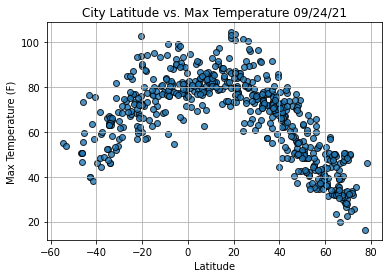

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

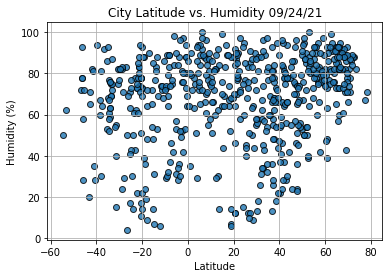

In [21]:
  # Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

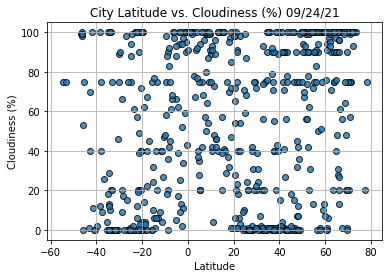

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

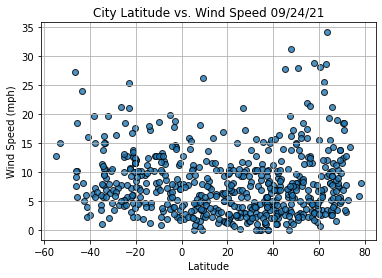

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City                        Bluff
Country                        NZ
Date          2021-09-24 15:28:07
Lat                         -46.6
Lng                      168.3333
Max Temp                    50.81
Humidity                       72
Cloudiness                     99
Wind Speed                  27.27
Name: 13, dtype: object

In [26]:
city_data_df["Lat"] >= 0


0      False
1      False
2      False
3      False
4       True
       ...  
581     True
582     True
583     True
584    False
585     True
Name: Lat, Length: 586, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Dikson,RU,2021-09-24 15:28:04,73.5069,80.5464,35.49,82,100,14.29
5,Leku,ET,2021-09-24 15:28:04,6.8667,38.4500,62.78,88,96,4.16
7,Sao Filipe,CV,2021-09-24 15:28:05,14.8961,-24.4956,79.03,76,57,6.15
9,Nikolskoye,RU,2021-09-24 15:28:05,59.7035,30.7861,50.40,82,100,6.71
10,Ewa Beach,US,2021-09-24 15:28:06,21.3156,-158.0072,76.98,77,1,11.01


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

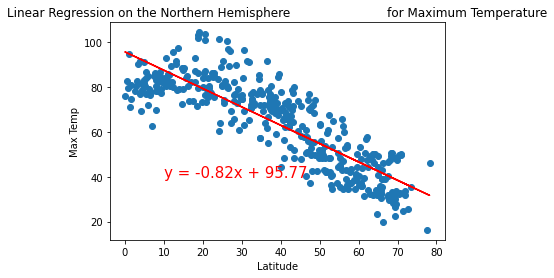

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

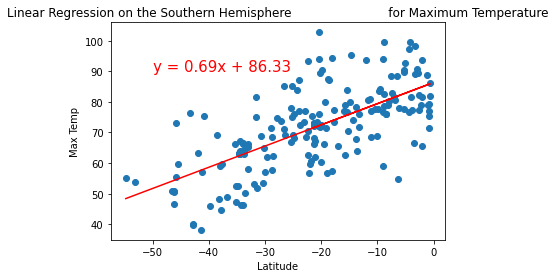

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

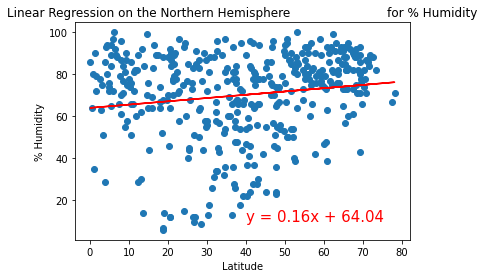

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

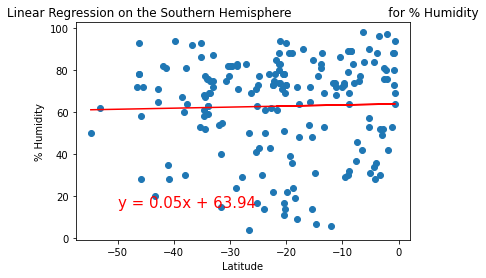

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

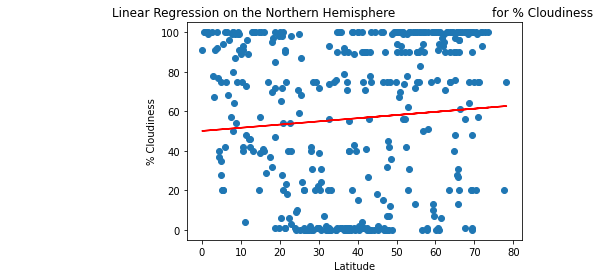

In [33]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness ', '% Cloudiness',(-50,60))

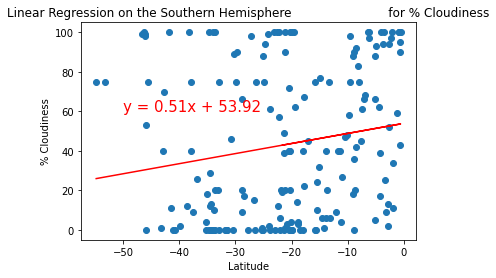

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

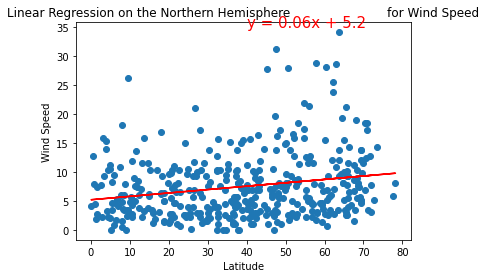

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

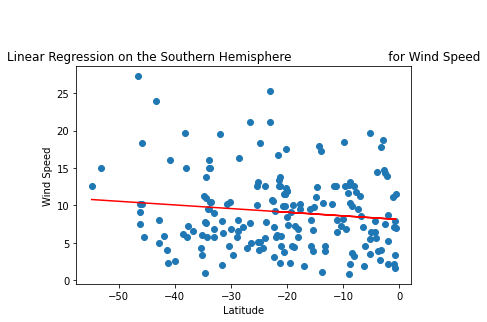

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))